In [26]:
import csv
import time
import nltk
import pandas as pd
from nltk.corpus import wordnet as wn
from nltk.tokenize import sent_tokenize
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.corpus import gutenberg
from sklearn import preprocessing
import numpy as np

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('gutenberg')

ModuleNotFoundError: No module named 'sort'

In [2]:
DATA_FILE_INPUT_PATH = "./src/data/en_US.txt"
DATA_FILE_OUTPUT_PATH = f"./src/output/results_eng_{time.time()}.txt"


In [3]:
results = ""

In [4]:

with open(DATA_FILE_INPUT_PATH, encoding="utf-8") as raw_text_file:
    english_dictionary_reader = csv.reader(raw_text_file, delimiter='\t', quotechar='\'')

    with open(DATA_FILE_OUTPUT_PATH,mode="w",encoding="utf-8") as output_file:
        print("Processing...")
        for i, defintion in enumerate(english_dictionary_reader):
            parsed = list(map(lambda a: a.replace("/",""), defintion[1:]))
            temp ="".join(parsed).replace("\u02C8","").replace("ˌ","").replace(", ","")
            # print(temp)
            results += temp
            # if i == 200:
            #     break
        print("Done")
        output_file.write(results)


Processing...
Done


In [5]:
all_freq = {} 
  
for i in results: 
    if i in all_freq: 
        all_freq[i] += 1
    else: 
        all_freq[i] = 1
print(all_freq)

{'k': 43051, 'ə': 71093, 'z': 28203, 'j': 5260, 'u': 9956, 'f': 13953, 'ɹ': 46435, 'ɪ': 76949, 's': 50391, 'o': 19324, 'ʊ': 25030, 'e': 13731, 'n': 61202, 'ɛ': 27683, 't': 53990, 'd': 38936, 'i': 35070, 'm': 29707, 'p': 19976, 'ɫ': 49936, 'ɑ': 25271, 'b': 21420, 'ɝ': 29132, 'ɡ': 13672, 'θ': 2942, 'ɔ': 12849, 'v': 10806, 'h': 9374, 'æ': 22020, 'ŋ': 9985, 'ʃ': 13758, 'ʒ': 6967, 'w': 8976, 'a': 14888, 'ð': 586}


In [6]:
with open(DATA_FILE_INPUT_PATH, encoding="utf-8") as raw_text_file:
    nlp_tokens = nltk.word_tokenize(raw_text_file.read())
    print(nlp_tokens)

'/zəˈdɪɫoʊ/', 'zadoc', '/ˈzɑdək/', 'zadok', '/ˈzɑdək/', 'zadora', '/zəˈdɔɹə/', 'zadrozny', '/zəˈdɹoʊzni/', 'zaentz', '/ˈzænts/', 'zaffino', '/zɑˈfinoʊ/', 'zaffuto', '/zəˈfutoʊ/', 'zaftig', '/ˈzæftɪɡ/', "zaftig's", '/ˈzæftɪɡz/', 'zag', '/ˈzæɡ/', 'zagar', '/zɑˈɡɑɹ/', 'zagat', '/ˈzæɡət/', 'zagel', '/ˈzeɪɡəɫ/', 'zager', '/ˈzeɪɡɝ/', 'zagged', '/ˈzæɡd/', 'zagha', '/ˈzɑɡə/', 'zagladin', '/ˈzæɡɫədɪn/', 'zagorski', '/zəˈɡɔɹski/', 'zagreb', '/ˈzɑˌɡɹɛb/', "zagreb's", '/ˈzɑˌɡɹɛbz/', 'zags', '/ˈzæɡz/', 'zagury', '/ˈzæɡjɝi/', 'zaher', '/ˈzeɪɝ/', 'zahir', '/zəˈhɪɹ/', 'zahler', '/ˈzɑɫɝ/', 'zahm', '/ˈzæm/', 'zahn', '/ˈzæn/', 'zahner', '/ˈzɑnɝ/', 'zahniser', '/ˈzɑnaɪzɝ/', 'zahnow', '/ˈzɑnoʊ/', 'zahradnik', '/zɝˈædnɪk/', 'zaibatsu', '/ˌzeɪˈbætˌsu/', 'zaid', '/ˈzeɪd/', 'zain', '/ˈzeɪn/', 'zaino', '/ˈzeɪnoʊ/', 'zaire', '/zaɪˈɪɹ/', "zaire's", '/zaɪˈɪɹz/', 'zairean', '/zaɪˈɪɹən/', "zairean's", '/zaɪˈɪɹənz/', 'zaireans', '/zaɪˈɪɹənz/', 'zairian', '/zaɪˈɪɹiən/', "zairian's", '/zaɪˈɪɹiənz/', 'zairians', '/zaɪˈɪ

In [7]:
res=wn.synset('locomotive.n.01').lemma_names()
print(res)

['locomotive', 'engine', 'locomotive_engine', 'railway_locomotive']


In [10]:
text = nltk.word_tokenize("A Python is a serpent which eats eggs from the nest")
tagged_text=nltk.pos_tag(text)
print(tagged_text)

[('A', 'DT'), ('Python', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('serpent', 'NN'), ('which', 'WDT'), ('eats', 'VBZ'), ('eggs', 'NNS'), ('from', 'IN'), ('the', 'DT'), ('nest', 'JJS')]


In [14]:
nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('IN')
nltk.help.upenn_tagset('DT')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [18]:


sample = gutenberg.raw("blake-poems.txt")
tokenized = sent_tokenize(sample)
for i in tokenized[:2]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            print(tagged)

[('[', 'JJ'), ('Poems', 'NNP'), ('by', 'IN'), ('William', 'NNP'), ('Blake', 'NNP'), ('1789', 'CD'), (']', 'NNP'), ('SONGS', 'NNP'), ('OF', 'NNP'), ('INNOCENCE', 'NNP'), ('AND', 'NNP'), ('OF', 'NNP'), ('EXPERIENCE', 'NNP'), ('and', 'CC'), ('THE', 'NNP'), ('BOOK', 'NNP'), ('of', 'IN'), ('THEL', 'NNP'), ('SONGS', 'NNP'), ('OF', 'NNP'), ('INNOCENCE', 'NNP'), ('INTRODUCTION', 'NNP'), ('Piping', 'VBG'), ('down', 'RP'), ('the', 'DT'), ('valleys', 'NN'), ('wild', 'JJ'), (',', ','), ('Piping', 'NNP'), ('songs', 'NNS'), ('of', 'IN'), ('pleasant', 'JJ'), ('glee', 'NN'), (',', ','), ('On', 'IN'), ('a', 'DT'), ('cloud', 'NN'), ('I', 'PRP'), ('saw', 'VBD'), ('a', 'DT'), ('child', 'NN'), (',', ','), ('And', 'CC'), ('he', 'PRP'), ('laughing', 'VBG'), ('said', 'VBD'), ('to', 'TO'), ('me', 'PRP'), (':', ':'), ('``', '``'), ('Pipe', 'VB'), ('a', 'DT'), ('song', 'NN'), ('about', 'IN'), ('a', 'DT'), ('Lamb', 'NN'), ('!', '.'), ("''", "''")]
[('So', 'RB'), ('I', 'PRP'), ('piped', 'VBD'), ('with', 'IN'), ('m

In [25]:
import parawrap

text = "In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as Godfather. He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, no Sicilian can refuse a request on his daughter's wedding day. One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment from the presiding judge. The Don is disappointed in Bonasera, who'd avoided most contact with the Don due to Corleone's nefarious business dealings. The Don's wife is godmother to Bonasera's shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his men punish the young men responsible (in a non-lethal manner) in return for future service if necessary."

print( parawrap.wrap(text))
# print(text)

['In late summer 1945, guests are gathered for the wedding reception of', "Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi", '(Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia', 'family, is known to friends and associates as Godfather. He and Tom', 'Hagen (Robert Duvall), the Corleone family lawyer, are hearing', 'requests for favors because, according to Italian tradition, no', "Sicilian can refuse a request on his daughter's wedding day. One of", 'the men who asks the Don for a favor is Amerigo Bonasera, a successful', 'mortician and acquaintance of the Don, whose daughter was brutally', 'beaten by two young men because she refused their advances; the men', 'received minimal punishment from the presiding judge. The Don is', "disappointed in Bonasera, who'd avoided most contact with the Don due", "to Corleone's nefarious business dealings. The Don's wife is godmother", "to Bonasera's shamed daughter, a relationship the Don uses to extract", 'new lo

In [8]:
# frequency_dist_ipa_english
grapheme_frequence_eng_count = {'k': 43051, 'ə': 71093, 'z': 28203, 'j': 5260, 'u': 9956, 'f': 13953, 'ɹ': 46435, 'ɪ': 76949, 's': 50391, 'o': 19324, 'ʊ': 25030, 'e': 13731, 'n': 61202, 'ɛ': 27683, 't': 53990, 'd': 38936, 'i': 35070, 'm': 29707, 'p': 19976, 'ɫ': 49936, 'ɑ': 25271, 'b': 21420, 'ɝ': 29132, 'ɡ': 13672, 'θ': 2942, 'ɔ': 12849, 'v': 10806, 'h': 9374, 'æ': 22020, 'ŋ': 9985, 'ʃ': 13758, 'ʒ': 6967, 'w': 8976, 'a': 14888, 'ð': 586}
freqency_json = {"letters":list(grapheme_frequence_eng_count.keys()),
"freq":list(rapheme_frequence_eng_count.values())}

grapheme_frequence_eng = ['k', 'ə', 'z', 'j', 'u', 'f', 'ɹ', 'ɪ', 's', 'o', 'ʊ', 'e', 'n', 'ɛ', 't', 'd', 'i', 'm', 'p', 'ɫ', 'ɑ', 'b', 'ɝ', 'ɡ', 'θ', 'ɔ', 'v', 'h', 'æ', 'ŋ', 'ʃ', 'ʒ', 'w', 'a', 'ð']


NameError: name 'rapheme_frequence_eng_count' is not defined

In [7]:
freqency_json


{'letters': dict_keys(['k', 'ə', 'z', 'j', 'u', 'f', 'ɹ', 'ɪ', 's', 'o', 'ʊ', 'e', 'n', 'ɛ', 't', 'd', 'i', 'm', 'p', 'ɫ', 'ɑ', 'b', 'ɝ', 'ɡ', 'θ', 'ɔ', 'v', 'h', 'æ', 'ŋ', 'ʃ', 'ʒ', 'w', 'a', 'ð']),
 'freq': dict_values([43051, 71093, 28203, 5260, 9956, 13953, 46435, 76949, 50391, 19324, 25030, 13731, 61202, 27683, 53990, 38936, 35070, 29707, 19976, 49936, 25271, 21420, 29132, 13672, 2942, 12849, 10806, 9374, 22020, 9985, 13758, 6967, 8976, 14888, 586])}

In [9]:
import pandas as pd
from sklearn import preprocessing

In [19]:
data = {'columns': [43051, 71093, 28203, 5260, 9956, 13953, 46435, 76949, 50391, 19324, 25030, 13731, 61202, 27683, 53990, 38936, 35070, 29707, 19976, 49936, 25271, 21420, 29132, 13672, 2942, 12849, 10806, 9374, 22020, 9985, 13758, 6967, 8976, 14888, 586]}
cols = data.columns
df = pd.DataFrame(data)
df


min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized


AttributeError: 'dict' object has no attribute 'columns'

In [20]:
import matplotlib.pyplot as plt 


ModuleNotFoundError: No module named 'matplotlib'

In [59]:
import pandas as pd 

ziped = list(zip([43051, 71093, 28203, 5260, 9956, 13953, 46435, 76949, 50391, 19324, 25030, 13731, 61202, 27683, 53990, 38936, 35070, 29707, 19976, 49936, 25271, 21420, 29132, 13672, 2942, 12849, 10806, 9374, 22020, 9985, 13758, 6967, 8976, 14888, 586],['k', 'ə', 'z', 'j', 'u', 'f', 'ɹ', 'ɪ', 's', 'o', 'ʊ', 'e', 'n', 'ɛ', 't', 'd', 'i', 'm', 'p', 'ɫ', 'ɑ', 'b', 'ɝ', 'ɡ', 'θ', 'ɔ', 'v', 'h', 'æ', 'ŋ', 'ʃ', 'ʒ', 'w', 'a', 'ð']))
print(ziped)
results = sorted(ziped, key=lambda row: row[0])

letters_sorted = list(map(lambda row: row[1],results)) 
freqency_sorted = list(map(lambda row: row[0],results)) 
print(letters_sorted)
print(freqency_sorted)

# create data 
df = pd.DataFrame([
                   freqency_sorted
                   ],  
    
                   columns=letters_sorted) 
  
# view data 
display(df)

[(43051, 'k'), (71093, 'ə'), (28203, 'z'), (5260, 'j'), (9956, 'u'), (13953, 'f'), (46435, 'ɹ'), (76949, 'ɪ'), (50391, 's'), (19324, 'o'), (25030, 'ʊ'), (13731, 'e'), (61202, 'n'), (27683, 'ɛ'), (53990, 't'), (38936, 'd'), (35070, 'i'), (29707, 'm'), (19976, 'p'), (49936, 'ɫ'), (25271, 'ɑ'), (21420, 'b'), (29132, 'ɝ'), (13672, 'ɡ'), (2942, 'θ'), (12849, 'ɔ'), (10806, 'v'), (9374, 'h'), (22020, 'æ'), (9985, 'ŋ'), (13758, 'ʃ'), (6967, 'ʒ'), (8976, 'w'), (14888, 'a'), (586, 'ð')]
['ð', 'θ', 'j', 'ʒ', 'w', 'h', 'u', 'ŋ', 'v', 'ɔ', 'ɡ', 'e', 'ʃ', 'f', 'a', 'o', 'p', 'b', 'æ', 'ʊ', 'ɑ', 'ɛ', 'z', 'ɝ', 'm', 'i', 'd', 'k', 'ɹ', 'ɫ', 's', 't', 'n', 'ə', 'ɪ']
[586, 2942, 5260, 6967, 8976, 9374, 9956, 9985, 10806, 12849, 13672, 13731, 13758, 13953, 14888, 19324, 19976, 21420, 22020, 25030, 25271, 27683, 28203, 29132, 29707, 35070, 38936, 43051, 46435, 49936, 50391, 53990, 61202, 71093, 76949]


,ð,θ,j,ʒ,w,h,u,ŋ,v,ɔ,...,i,d,k,ɹ,ɫ,s,t,n,ə,ɪ
0,586,2942,5260,6967,8976,9374,9956,9985,10806,12849,...,35070,38936,43051,46435,49936,50391,53990,61202,71093,76949


<AxesSubplot:>

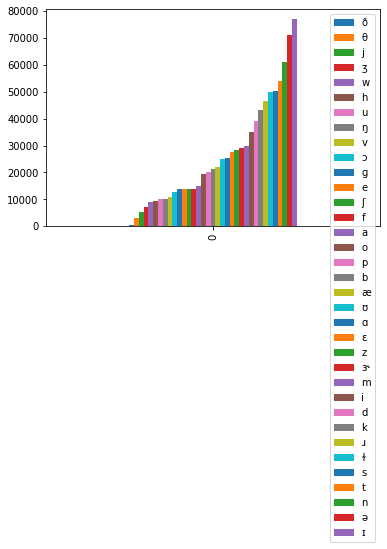

In [60]:
import matplotlib.pyplot as plt 
df.plot(kind = 'bar')

In [62]:

# copy the data 
df_max_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
# view normalized data 
display(df_max_scaled) 

,ð,θ,j,ʒ,w,h,u,ŋ,v,ɔ,...,i,d,k,ɹ,ɫ,s,t,n,ə,ɪ
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:>

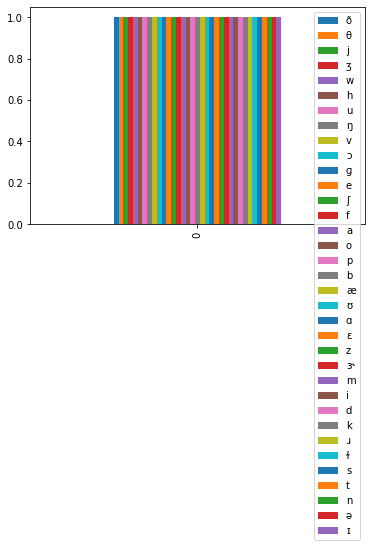

In [63]:

import matplotlib.pyplot as plt 
df_max_scaled.plot(kind = 'bar')

In [31]:
# copy the data 
df_z_scaled = df.copy() 
  
# apply normalization techniques 
for column in df_z_scaled.columns: 
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()     
  
# view normalized data    
display(df_z_scaled)

,k,ə,z,j,u,f,ɹ,ɪ,s,o,...,ɔ,v,h,æ,ŋ,ʃ,ʒ,w,a,ð
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

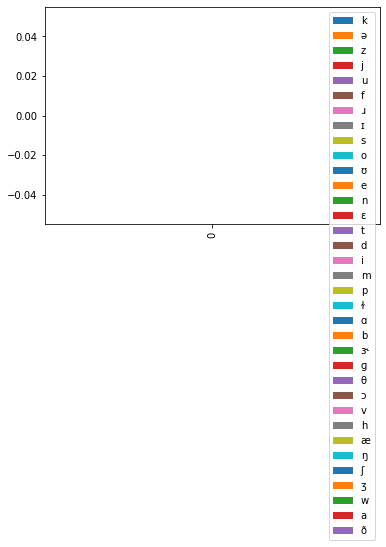

In [32]:
import matplotlib.pyplot as plt 
df_z_scaled.plot(kind='bar')

In [33]:
import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [34]:
df


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
ziped = list(zip([43051, 71093, 28203, 5260, 9956, 13953, 46435, 76949, 50391, 19324, 25030, 13731, 61202, 27683, 53990, 38936, 35070, 29707, 19976, 49936, 25271, 21420, 29132, 13672, 2942, 12849, 10806, 9374, 22020, 9985, 13758, 6967, 8976, 14888, 586],['k', 'ə', 'z', 'j', 'u', 'f', 'ɹ', 'ɪ', 's', 'o', 'ʊ', 'e', 'n', 'ɛ', 't', 'd', 'i', 'm', 'p', 'ɫ', 'ɑ', 'b', 'ɝ', 'ɡ', 'θ', 'ɔ', 'v', 'h', 'æ', 'ŋ', 'ʃ', 'ʒ', 'w', 'a', 'ð']))
print(ziped)
results = sorted(ziped, key=lambda row: row[0])

letters_sorted = list(map(lambda row: row[1],results)) 
freqency_sorted = list(map(lambda row: row[0],results)) 
print(letters_sorted)
print(freqency_sorted)

[(43051, 'k'), (71093, 'ə'), (28203, 'z'), (5260, 'j'), (9956, 'u'), (13953, 'f'), (46435, 'ɹ'), (76949, 'ɪ'), (50391, 's'), (19324, 'o'), (25030, 'ʊ'), (13731, 'e'), (61202, 'n'), (27683, 'ɛ'), (53990, 't'), (38936, 'd'), (35070, 'i'), (29707, 'm'), (19976, 'p'), (49936, 'ɫ'), (25271, 'ɑ'), (21420, 'b'), (29132, 'ɝ'), (13672, 'ɡ'), (2942, 'θ'), (12849, 'ɔ'), (10806, 'v'), (9374, 'h'), (22020, 'æ'), (9985, 'ŋ'), (13758, 'ʃ'), (6967, 'ʒ'), (8976, 'w'), (14888, 'a'), (586, 'ð')]
['ð', 'θ', 'j', 'ʒ', 'w', 'h', 'u', 'ŋ', 'v', 'ɔ', 'ɡ', 'e', 'ʃ', 'f', 'a', 'o', 'p', 'b', 'æ', 'ʊ', 'ɑ', 'ɛ', 'z', 'ɝ', 'm', 'i', 'd', 'k', 'ɹ', 'ɫ', 's', 't', 'n', 'ə', 'ɪ']
[586, 2942, 5260, 6967, 8976, 9374, 9956, 9985, 10806, 12849, 13672, 13731, 13758, 13953, 14888, 19324, 19976, 21420, 22020, 25030, 25271, 27683, 28203, 29132, 29707, 35070, 38936, 43051, 46435, 49936, 50391, 53990, 61202, 71093, 76949]


In [65]:
freqency_list = [43051, 71093, 28203, 5260, 9956, 13953, 46435, 76949, 50391, 19324, 25030, 13731, 61202, 27683, 53990, 38936, 35070, 29707, 19976, 49936, 25271, 21420, 29132, 13672, 2942, 12849, 10806, 9374, 22020, 9985, 13758, 6967, 8976, 14888, 586]
norm = np.linalg.norm(freqency_list)
normal_array = freqency_list/norm
print(normal_array)

[0.22256984 0.36754449 0.145807   0.02719373 0.05147163 0.07213577
 0.24006482 0.39781949 0.26051699 0.09990336 0.12940287 0.07098805
 0.3164089  0.14311865 0.2791235  0.20129566 0.18130878 0.15358255
 0.10327414 0.25816468 0.13064882 0.11073949 0.15060985 0.07068302
 0.01520988 0.06642819 0.05586606 0.04846275 0.11384144 0.05162156
 0.07112764 0.03601877 0.04640512 0.07696964 0.00302957]


In [71]:
# create data 
df = pd.DataFrame([
                   [0.22256984,0.36754449,0.145807,0.02719373,0.05147163,0.07213577,
                   0.24006482,0.39781949,0.26051699,0.09990336,0.12940287,0.07098805,
                   0.3164089, 0.14311865,0.2791235,0.20129566,0.18130878,0.15358255,
                   0.10327414,0.25816468,0.13064882,0.11073949,0.15060985,0.07068302,
                   0.01520988,0.06642819,0.05586606,0.04846275,0.11384144,0.05162156,
                   0.07112764,0.03601877,0.04640512,0.07696964,0.00302957]
                   ],  
    
                   columns=['ð', 'θ', 'j', 'ʒ', 'w', 'h', 'u', 'ŋ', 'v', 'ɔ', 'ɡ', 'e', 'ʃ', 'f', 'a', 'o', 'p', 'b', 'æ', 'ʊ', 'ɑ', 'ɛ', 'z', 'ɝ', 'm', 'i', 'd', 'k', 'ɹ', 'ɫ', 's', 't', 'n', 'ə', 'ɪ']) 
  
# view data 
display(df)

,ð,θ,j,ʒ,w,h,u,ŋ,v,ɔ,...,i,d,k,ɹ,ɫ,s,t,n,ə,ɪ
0,0.22257,0.367544,0.145807,0.027194,0.051472,0.072136,0.240065,0.397819,0.260517,0.099903,...,0.066428,0.055866,0.048463,0.113841,0.051622,0.071128,0.036019,0.046405,0.07697,0.00303


<AxesSubplot:>

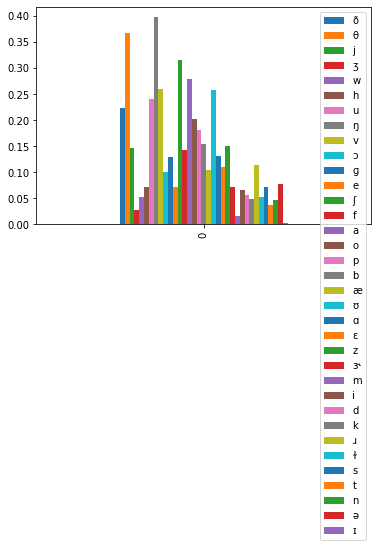

In [72]:
import matplotlib.pyplot as plt 
df.plot(kind = 'bar')

In [73]:
freq_dict = dict(zip(['ð', 'θ', 'j', 'ʒ', 'w', 'h', 'u', 'ŋ', 'v', 'ɔ', 'ɡ', 'e', 'ʃ', 'f', 'a', 'o', 'p', 'b', 'æ', 'ʊ', 'ɑ', 'ɛ', 'z', 'ɝ', 'm', 'i', 'd', 'k', 'ɹ', 'ɫ', 's', 't', 'n', 'ə', 'ɪ'],[0.22256984,0.36754449,0.145807,0.02719373,0.05147163,0.07213577,
                   0.24006482,0.39781949,0.26051699,0.09990336,0.12940287,0.07098805,
                   0.3164089, 0.14311865,0.2791235,0.20129566,0.18130878,0.15358255,
                   0.10327414,0.25816468,0.13064882,0.11073949,0.15060985,0.07068302,
                   0.01520988,0.06642819,0.05586606,0.04846275,0.11384144,0.05162156,
                   0.07112764,0.03601877,0.04640512,0.07696964,0.00302957]))

                   


In [74]:
freq_dict

{'ð': 0.22256984,
 'θ': 0.36754449,
 'j': 0.145807,
 'ʒ': 0.02719373,
 'w': 0.05147163,
 'h': 0.07213577,
 'u': 0.24006482,
 'ŋ': 0.39781949,
 'v': 0.26051699,
 'ɔ': 0.09990336,
 'ɡ': 0.12940287,
 'e': 0.07098805,
 'ʃ': 0.3164089,
 'f': 0.14311865,
 'a': 0.2791235,
 'o': 0.20129566,
 'p': 0.18130878,
 'b': 0.15358255,
 'æ': 0.10327414,
 'ʊ': 0.25816468,
 'ɑ': 0.13064882,
 'ɛ': 0.11073949,
 'z': 0.15060985,
 'ɝ': 0.07068302,
 'm': 0.01520988,
 'i': 0.06642819,
 'd': 0.05586606,
 'k': 0.04846275,
 'ɹ': 0.11384144,
 'ɫ': 0.05162156,
 's': 0.07112764,
 't': 0.03601877,
 'n': 0.04640512,
 'ə': 0.07696964,
 'ɪ': 0.00302957}

In [75]:
import random

In [76]:
random.random()


0.2789720860300057

# sort

In [191]:
freq_dict = {'k': 43051, 'ə': 71093, 'z': 28203, 'j': 5260, 'u': 9956, 'f': 13953, 'ɹ': 46435, 'ɪ': 76949, 's': 50391, 'o': 19324, 'ʊ': 25030, 'e': 13731, 'n': 61202, 'ɛ': 27683, 't': 53990, 'd': 38936, 'i': 35070, 'm': 29707, 'p': 19976, 'ɫ': 49936, 'ɑ': 25271, 'b': 21420, 'ɝ': 29132, 'ɡ': 13672, 'θ': 2942, 'ɔ': 12849, 'v': 10806, 'h': 9374, 'æ': 22020, 'ŋ': 9985, 'ʃ': 13758, 'ʒ': 6967, 'w': 8976, 'a': 14888, 'ð': 586}

# [How to Sort a Dictionary by Value in Python](https://stackabuse.com/how-to-sort-dictionary-by-value-in-python/)
import operator

# letters = list(freq_dict.keys())
# freq_vals = list(freq_dict.values())

print(letters)
print(freq_vals)

dict1 = freq_dict
sorted_tuples = sorted(dict1.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
sorted_dict = {k: v for k, v in sorted_tuples}
print(sorted_dict)
freq_dict = sorted_dict


dict_keys(['ɪ', 'ə', 'n', 't', 's', 'ɫ', 'ɹ', 'k', 'd', 'i', 'm', 'ɝ', 'z', 'ɛ', 'ɑ', 'ʊ', 'æ', 'b', 'p', 'o', 'a', 'f', 'ʃ', 'e', 'ɡ', 'ɔ', 'v', 'ŋ', 'u', 'h', 'w', 'ʒ', 'j', 'θ', 'ð', 0.3978194862745638, 0.7653639733727401, 1.0817728701612084, 1.3608963683738389, 1.6214133566759812, 1.879578035445122, 2.1196428555878057, 2.342212696698233, 2.543508353790416, 2.7248171347186796, 2.8783996826238956, 3.0290095316687253, 3.174816533337383, 3.3179351812540387, 3.4485840036902564, 3.5779868775606425, 3.691828319135788, 3.802567814074009, 3.905841957439364, 4.005745318792593, 4.082714954676825, 4.154850723718515, 4.225978360103205, 4.296966408889232, 4.3676494329226285, 4.434077620152377, 4.489943679083395, 4.541565241032888, 4.593036875561596, 4.641499621852487, 4.6879047435408845, 4.7239235139066444, 4.751117246090353, 4.766327124433409, 4.769356692315473])
[0.3978194862745638, 0.7653639733727401, 1.0817728701612084, 1.3608963683738389, 1.6214133566759812, 1.879578035445122, 2.11964285558

,ɪ,ə,n,t,s,ɫ,ɹ,k,d,i,...,ɔ,v,ŋ,u,h,w,ʒ,j,θ,ð
0,76949,71093,61202,53990,50391,49936,46435,43051,38936,35070,...,12849,10806,9985,9956,9374,8976,6967,5260,2942,586


<AxesSubplot:>

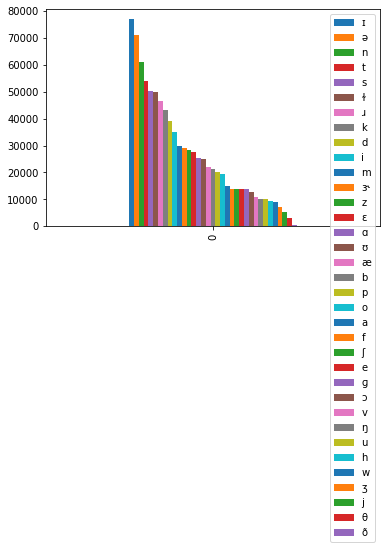

In [192]:

df = pd.DataFrame([
    list(freq_dict.values())
    ],columns=list(freq_dict.keys())
    )
display(df)
import matplotlib.pyplot as plt 
df.plot(kind = 'bar')

# Normailzed

# Old one
```
[0.39781949 0.36754449 0.3164089  0.2791235  0.26051699 0.25816468
 0.24006482 0.22256984 0.20129566 0.18130878 0.15358255 0.15060985
 0.145807   0.14311865 0.13064882 0.12940287 0.11384144 0.11073949
 0.10327414 0.09990336 0.07696964 0.07213577 0.07112764 0.07098805
 0.07068302 0.06642819 0.05586606 0.05162156 0.05147163 0.04846275
 0.04640512 0.03601877 0.02719373 0.01520988 0.00302957]
 ````

In [205]:
freqency_list = list(freq_dict.values()) 
print(freqency_list)
total_sum = sum(freqency_list)
normalized = []
for num in freqency_list:
    normalized.append(num/total_sum)
print(normalized)
temp_dict = freq_dict
for i, letter in enumerate(temp_dict):
    freq_dict[letter] = normalized[i]
print(freq_dict)

[0.3978194862745638, 0.3675444870981763, 0.3164088967884684, 0.27912349821263044, 0.26051698830214226, 0.25816467876914084, 0.24006482014268374, 0.222569841110427, 0.20129565709218336, 0.18130878092826355, 0.15358254790521603, 0.1506098490448296, 0.14580700166865745, 0.14311864791665585, 0.13064882243621753, 0.129402873870386, 0.11384144157514582, 0.11073949493822086, 0.1032741433653548, 0.09990336135322969, 0.0769696358842312, 0.0721357690416898, 0.07112763638468919, 0.07098804878602757, 0.07068302403339662, 0.06642818722974789, 0.055866058931018425, 0.05162156194949278, 0.05147163452870807, 0.04846274629089087, 0.04640512168839731, 0.03601877036576026, 0.027193732183708765, 0.015209878343055358, 0.003029567882063372]
[0.08341156091670439, 0.07706374482126169, 0.06634204929530134, 0.05852434955480734, 0.05462308757948318, 0.05412987440949916, 0.05033484296309463, 0.046666637760400274, 0.042206039530764565, 0.038015353563383834, 0.03220194206750624, 0.03157865069884511, 0.0305716286440

,ɪ,ə,n,t,s,ɫ,ɹ,k,d,i,...,ɔ,v,ŋ,u,h,w,ʒ,j,θ,ð
0,0.083412,0.077064,0.066342,0.058524,0.054623,0.05413,0.050335,0.046667,0.042206,0.038015,...,0.013928,0.011714,0.010824,0.010792,0.010161,0.00973,0.007552,0.005702,0.003189,0.000635


<AxesSubplot:>

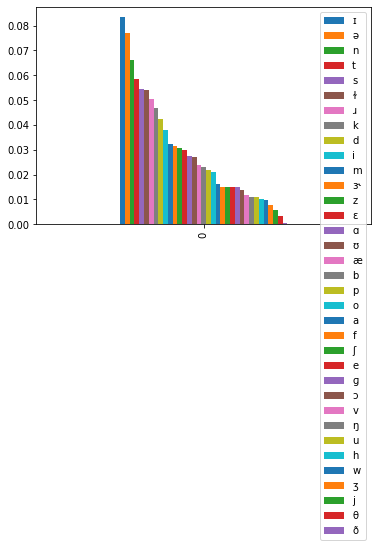

In [206]:
df = pd.DataFrame([
    list(freq_dict.values())
    ],columns=list(freq_dict.keys())
    )
display(df)
import matplotlib.pyplot as plt 
df.plot(kind = 'bar')


# Generated characters based on random freqency distrobution

### geneate cumulitive frequency table 

In [262]:
# what this does is convert the frequecy distubtion of the letters into 
# a linear scale
temp = freq_dict
temp = list(temp.values())
print(temp)
print("\n")

result = []
# note range(1,len(temp)+1) the 1's make the index start at with splice [0.397819486274563] instead of empty
for i in range(1,len(temp)+1):
    result.append(sum(temp[0:i]))
print(result)
print("\n")

freq_vals = result
letters = list(freq_dict.keys())
print(letters)
print(freq_vals)



[0.08341156091670439, 0.07706374482126169, 0.06634204929530134, 0.05852434955480734, 0.05462308757948318, 0.05412987440949916, 0.05033484296309463, 0.046666637760400274, 0.042206039530764565, 0.038015353563383834, 0.03220194206750624, 0.03157865069884511, 0.030571628644086524, 0.030007956449819073, 0.02739338465640927, 0.02713214427406608, 0.02386934945724871, 0.023218958463863182, 0.021653684139782022, 0.020946925926969756, 0.016138368515872786, 0.015124842551180346, 0.01491346547833005, 0.014884197883627702, 0.014820242769278125, 0.013928123123350981, 0.011713541790873276, 0.010823590114924085, 0.010792154550243785, 0.010161275286659827, 0.009729849261047429, 0.007552123418194902, 0.005701761042013088, 0.0031890838375670163, 0.0006352152035398611]


[0.08341156091670439, 0.1604753057379661, 0.22681735503326744, 0.2853417045880748, 0.339964792167558, 0.39409466657705716, 0.4444295095401518, 0.49109614730055207, 0.5333021868313166, 0.5713175403947004, 0.6035194824622067, 0.635098133161

## Generate random words based off of freqeceny distrobution found in perviose steps
##### examplse:
```text
sɪɝ
wiɫnæ
aəɑs
eɪəɪw

ɫɡbkʃ itɫf ots kɝiɫm ɑɫ ʊɹd bə ɪbmkn aptv ɪt uʊɡ miɪɪɫ sdə əɪ tksʊ htvæ ɫzɡtæ vnɛ tm ɑɹto
```

In [329]:
import random
# dist = freq_dict
dist = freq_vals
# get random number betwe

def gen_weighted_character(_freq_vals,_letters):
    random_num = random.random()
    # print(random_num)
    for i, num in enumerate(_freq_vals): 
        # print(not random_num > num,end=f", {_letters[i]}, ")
        # print(num)
        if  not random_num > num:
            return _letters[i]
def generate_weighted_word(word_length = 5):
    result = ""
    for x in range(0,word_length):
        result+=gen_weighted_character(freq_vals,letters)
    return result

def generate_weighted_words(num_words, low=2,high=5):
    return [ generate_weighted_word(random.randint(low,high)) for x in range(0,num_words)]

print(" ".join(generate_weighted_words(20)))
print(" ".join(generate_weighted_words(20)))
print(" ".join(generate_weighted_words(20)))
print(" ".join(generate_weighted_words(20)))

ʊɫ æɫ dpb shɪ bɪ ɑuɹh ɪzɛ azs ɫvnn ənɪ ddɔe dəɝm sɝkje tnhkk ɪɑædk nɪə əəə oɪ æoɪ ɫm
əʃkə ʊŋ ɛp mɪ min vɹno ɪət dɝ dɪfəu dɪɪbn tdʊ ɫsvoə ɫtt ɫpɝɝ pəs nɹɫəd ŋtkkɑ dɹk nsɫʊ ɹsæɪɡ
ɫɫt ɹəɹɪɫ ikɫbb bkkɛ tinɡ ɝp ku nn zfɪɛ mɪ əɫɛ iɪɛɝ ɫiɡʊ nɹmɑɪ ədnwɪ ɑsɛf kpɝa ɫz mɝɹ ts
dɑ ɪd əttɪŋ ntkd stsm iənɡn bɫjn ɝɹoə ɫd tvoɑ ɪnɫɹ zsɪdn ɹhmn nəɹ kæɫɪk zt znʒpə nz kɡnɑo ɹŋfn


# Compaire vs random
##### examplse:
```text
dpɛpa uɛvɛt usuwŋ əvɹsɑ ŋazɔɪ ɡzɝɔt mɹɑzɹ pjumʊ ʊθifb jbðbæ nwowo ɑɪɔʊɝ tueiu ðvakh msohf aætθj vɡtsw dɹhdn ozɛʒe ɡzjɔɫ


əθuks pɑŋed ɫŋusɛ ɝɹttw eksau ɡɝuoh mspnw suɝvŋ ʃɑsʃɫ ŋʃnit ʒjomt ohʊæʃ ɪmŋɝu iɑfəɔ fʊhəɛ ɫzjkŋ kɛnɡə əʃpsv azjət aɪænv
uʊəɹŋ pʊmjw ʒoamɡ ɡjzʒð dæphe ʒɪəʒɪ ŋuvɝð ŋjbvə pɪɡuɡ hfʒtk ðmɝŋŋ æoθmɡ hefθn æpuɡɫ oɫojs hoeew zæzʊo ɪæadk tɛʊθb aæɝeu
tjɪəi æʊitɛ jɑfɑk ʊɑzðð ɔoɝʊə ɡðoʒm ɫŋɔðh ʃwɡbθ epɔsu ʃwuup æɑkjf njifə ejzɫθ ɡetva ɫedds bɹovm dhɑod ztiʃv ŋhzɡv pvvpɫ
æfɪuɑ tzŋhʊ ɛkθsk kmæod θɹjbe nevpɡ ʃɫmnɪ jfjjɔ ɛpʊmb əhɡsi ɑɫɝaa eθɪʒz avɛʃf ɹmama kfɹɝɡ bɔhbɹ ɔnʒtʃ kbæaæ æktkm ofbɹm
```

In [330]:
import random 
english_ipa = ['ɪ', 'ə', 'n', 't', 's', 'ɫ', 'ɹ', 'k', 'd', 'i', 'm', 'ɝ', 'z', 'ɛ', 'ɑ', 'ʊ', 'æ', 'b', 'p', 'o', 'a', 'f', 'ʃ', 'e', 'ɡ', 'ɔ', 'v', 'ŋ', 'u', 'h', 'w', 'ʒ', 'j', 'θ', 'ð']

def generate_random_word(word_length):
    num_length = 5
    result = ""
    for x in range(0,num_length):
        result += random.choice(english_ipa)
    return result
def generate_random_words(num_words, low=2,high=5):
    return [ generate_random_word(random.randint(low,high)) for x in range(0,num_words)]

print(" ".join(generate_random_words(20)))
print(" ".join(generate_random_words(20)))
print(" ".join(generate_random_words(20)))
print(" ".join(generate_random_words(20)))

# print(gen_random_character(random.randint(3,5)))
# print(gen_random_character(random.randint(3,5)))
# print(gen_random_character(random.randint(3,5)))
# print(gen_random_character(random.randint(3,5)))

eŋʃpɑ nkdʒɔ skɫɝm tnzjð ɪjkʃw ɛkəjz ðaopə pwkʃɡ ɔuuɑæ ɹebwp vvaðθ ɔamtn zpʒeu θfʃɑz dθɡɪj ɝvpfk ʃjæðe uizoɑ sfjnɑ mtbʒŋ
dʒkʒe wmɑwz wɝvʒɪ zɛpvb voʊdd ɝkaof ðsomk tpæeɪ eevɛa wðntb dɑjks oŋhʃa ɔʊɫwə ɡθikɹ mʊjʒf ʃnɝɑŋ wsʃtɝ ðɔʃɹj ʒθhðs ʃbaia
sɔəɡŋ ʒðɹzi wθæɑe hɡmnð aadʃʃ wtdee wɪedb əbovv ɝeewθ zdbɔk bhsɡt zztof ʃʃfθn sʒəoj æʃkʊʒ əθeʃk ɹʊʃɑt wɪsjw ɪdive fɔɑɑɑ
ɛəpiæ oʊivɔ ðfeθw ɡpkɡŋ ɝɛæfʊ ðeæɔŋ əjuwv ɹɹfzθ ɔɡɛɪp owŋew ðʊnɹŋ fɑevf jɫtɫo uotve əoʊvi muoɫɹ ɝθðɹʒ ʊfmɫi fejsŋ ɹsʊɪd


# Using non-me-distrubution from wiki page
##### examplse:
```text
zrʒðŋ hdʒsfv dʒʃmmθ tskms fswps ʃʍɡmv hwŋbð rpzʒd wtʃtʃhdʒ zspbʒ hbksŋ sʒwzt vthtʃŋ swlnp tŋʃvɡ ððtʃkw dʒlwbr dʒvθðθ ŋðfðdʒ ðpdŋt

ʒʃʒθdʒ dʒŋln ŋdɡfb ʃvfθɡ ɡslbŋ θðkʃθ lrlŋh hʍrwʃ lðwll dʒðʒtʃf bŋkzm kʍmdɡ psjwz zzθnʒ wθktʃ ʃkdpw θðfθd sptbp dʒsnjp tʃpwrj
flznv zmʃdʒj rzbtʃð tʃpldk bvŋmv zfvltʃ rðɡsm zjddʃ dʒdʒðɡf tʃpjmz zwjʒɡ nʃŋkb ðʍfnr pstʃdŋ jkmfw wðkrr lɡlɡs dŋjdʍ hdnfɡ tmnwh
vfdtʃn θðʍsp kpɡsz dhɡdʍ blflŋ fʍdðw vbpʃʒ ŋvŋfv ɡŋwtk ŋbŋjʃ tʃvkvf jtʃmwp nʍhtʃn wtnwʒ ʍjzld ʍʃfʃp vlhsʒ θsθpʍ rpvkɡ ʃhktf
dɡjbr kθlhŋ ŋdʒdpdʒ wdʒftʃs ftbzk ʃmʒʃw tnmtʃj mkbjʍ phkdɡ hzŋhf fwdʒfʒ bpfʃtʃ hθtŋb bwhmʃ spdʒpŋ lsdʒnm dnfnŋ ntʃhtθ ðfjnd tʃhrpp
hθʒzp lðtʃr ʃθttʃdʒ θwmtr tʃkɡnð zɡððr rzjrs θzʍbθ tʃldʍp wklpv fjbth swmpð ðrɡrθ ʍpvŋʃ fŋthʍ sɡɡʒd zŋðdʒθ vwŋmtʃ ʃwtʃrk ʒfdʍb
```

In [331]:
import random 
english_ipa = ["p","b","t","d","k","ɡ","f","v","θ","ð","s","z","ʃ","ʒ","h","m","n","ŋ","l","r","w","j","ʍ","tʃ","dʒ"]

def generate_random_word(word_length):
    num_length = 5
    result = ""
    for x in range(0,num_length):
        result += random.choice(english_ipa)
    return result
def generate_random_words(num_words, low=2,high=5):
    return [ generate_random_word(random.randint(low,high)) for x in range(0,num_words)]

print(" ".join(generate_random_words(20)))
print(" ".join(generate_random_words(20)))
print(" ".join(generate_random_words(20)))
print(" ".join(generate_random_words(20)))
print(" ".join(generate_random_words(20)))


wʒɡʍɡ mdkwf rlsrk θɡhsk wðfmŋ tʃtʃmtʃn krðʃð θrdʒdtʃ ztʃʃb ðfɡjt θtvvz ʒʒjtʃʒ tvzwz ɡslvb kŋðmʍ tʃvʃltʃ fjlzv vdzbv bnrʍh kfzws
mðʃʍr dmpθʒ pvssʍ kθhɡtʃ hŋbdʒʒ lknkd ʃzʍdʒv dʒðtʃdʒs dŋmtʃŋ ɡmðdʒʍ dʒðbsdʒ bðvŋɡ ðʍzŋdʒ vrtsdʒ wzʒvɡ ʃʒtdʒn zdʒsdʍ srzdθ ʒrtpr ŋttʒt
knfhb nvʒrz jtʃbŋr vsŋŋb jtnhʍ sfwnh tbmll vɡmbs ʃbbŋk dʒjhvk ttʃhbl ɡnðfr ʍrʍzv θɡʃhp lwtʒw jmkɡʒ sʃshθ tʃðnkk ŋdʒŋɡp zztzf
fjŋvt bkjtθ swfjf wʃŋfh ŋɡvtk brdmʍ dljθh mðmkθ nʍrvs lbnmʃ vhtʃʃz ŋʃɡpn ʒɡwɡv bðtrh ɡvntð ʍnlɡv hdwfh zpnʃtʃ rttʃʃɡ mpdzn
ʍstʃfs wθkrŋ btʃvŋp dwʍld vnɡθð pðɡwð bdʒʍzt ðwlnp kʍrtw kʃklz dʍtʃjʒ vŋfph θʃθpk lkkhŋ bʃʍkr ntʍʒf θjjrt fmʒdŋ ʃzðnθ rnʒθw


0.9999999999999996

# trying different requency distrobution

['E', 'A', 'R', 'I', 'O', 'T', 'N', 'S', 'L', 'C', 'U', 'D', 'P', 'M', 'H', 'G', 'B', 'F', 'Y', 'W', 'K', 'V', 'X', 'Z', 'J', 'Q']
[0.11160688839311159, 0.19657280342719655, 0.27238172761827234, 0.3478296521703478, 0.4194645805354194, 0.4889735110264889, 0.5555174444825555, 0.6128683871316128, 0.6677613322386677, 0.7131492868507131, 0.7494572505427494, 0.7833012166987832, 0.8149721850278149, 0.845101154898845, 0.875135124864875, 0.8998401001598997, 0.9205600794399204, 0.9386810613189385, 0.9564600435399563, 0.9693590306409692, 0.9803750196249802, 0.9904490095509902, 0.9933510066489931, 0.9960730039269958, 0.9980380019619978, 0.9999999999999998]
[('E', 11.1607), ('A', 8.4966), ('R', 7.5809), ('I', 7.5448), ('O', 7.1635), ('T', 6.9509), ('N', 6.6544), ('S', 5.7351), ('L', 5.4893), ('C', 4.5388), ('U', 3.6308), ('D', 3.3844), ('P', 3.1671), ('M', 3.0129), ('H', 3.0034), ('G', 2.4705), ('B', 2.072), ('F', 1.8121), ('Y', 1.7779), ('W', 1.2899), ('K', 1.1016), ('V', 1.0074), ('X', 0.2902), (

,E,A,R,I,O,T,N,S,L,C,...,B,F,Y,W,K,V,X,Z,J,Q
0,11.1607,8.4966,7.5809,7.5448,7.1635,6.9509,6.6544,5.7351,5.4893,4.5388,...,2.072,1.8121,1.7779,1.2899,1.1016,1.0074,0.2902,0.2722,0.1965,0.1962


[11.1607, 8.4966, 7.5809, 7.5448, 7.1635, 6.9509, 6.6544, 5.7351, 5.4893, 4.5388, 3.6308, 3.3844, 3.1671, 3.0129, 3.0034, 2.4705, 2.072, 1.8121, 1.7779, 1.2899, 1.1016, 1.0074, 0.2902, 0.2722, 0.1965, 0.1962]
[0.11160688839311159, 0.08496591503408496, 0.0758089241910758, 0.07544792455207544, 0.07163492836507163, 0.0695089304910695, 0.06654393345606653, 0.057350942649057345, 0.054892945107054884, 0.04538795461204538, 0.0363079636920363, 0.033843966156033835, 0.031670968329031664, 0.030128969871030125, 0.03003396996603003, 0.0247049752950247, 0.020719979280020718, 0.018120981879018117, 0.017778982221017776, 0.012898987101012897, 0.011015988984011012, 0.010073989926010073, 0.0029019970980029017, 0.0027219972780027214, 0.001964998035001965, 0.0019619980380019618]
{'E': 0.11160688839311159, 'A': 0.08496591503408496, 'R': 0.0758089241910758, 'I': 0.07544792455207544, 'O': 0.07163492836507163, 'T': 0.0695089304910695, 'N': 0.06654393345606653, 'S': 0.057350942649057345, 'L': 0.054892945107054

,E,A,R,I,O,T,N,S,L,C,...,B,F,Y,W,K,V,X,Z,J,Q
0,0.111607,0.084966,0.075809,0.075448,0.071635,0.069509,0.066544,0.057351,0.054893,0.045388,...,0.02072,0.018121,0.017779,0.012899,0.011016,0.010074,0.002902,0.002722,0.001965,0.001962


[0.11160688839311159, 0.08496591503408496, 0.0758089241910758, 0.07544792455207544, 0.07163492836507163, 0.0695089304910695, 0.06654393345606653, 0.057350942649057345, 0.054892945107054884, 0.04538795461204538, 0.0363079636920363, 0.033843966156033835, 0.031670968329031664, 0.030128969871030125, 0.03003396996603003, 0.0247049752950247, 0.020719979280020718, 0.018120981879018117, 0.017778982221017776, 0.012898987101012897, 0.011015988984011012, 0.010073989926010073, 0.0029019970980029017, 0.0027219972780027214, 0.001964998035001965, 0.0019619980380019618]


[0.11160688839311159, 0.19657280342719655, 0.27238172761827234, 0.3478296521703478, 0.4194645805354194, 0.4889735110264889, 0.5555174444825555, 0.6128683871316128, 0.6677613322386677, 0.7131492868507131, 0.7494572505427494, 0.7833012166987832, 0.8149721850278149, 0.845101154898845, 0.875135124864875, 0.8998401001598997, 0.9205600794399204, 0.9386810613189385, 0.9564600435399563, 0.9693590306409692, 0.9803750196249802, 0.9904490095509

,E,A,R,I,O,T,N,S,L,C,...,B,F,Y,W,K,V,X,Z,J,Q
0,0.111607,0.084966,0.075809,0.075448,0.071635,0.069509,0.066544,0.057351,0.054893,0.045388,...,0.02072,0.018121,0.017779,0.012899,0.011016,0.010074,0.002902,0.002722,0.001965,0.001962


here
CG ENWTN CSERN ORWNM HPEMT TE BTTS CHLC WRWPA CTLT CACII UN ST ON MTEDI NARN BN ENSO FD AR
ES MEJD NT EIN FRLS EM EE YRN RRMN DNTE NEALQ ID ROD NEI ILTNL AWOUS JTUOE RF TTOS WCT
DS DI BS RIAAI TSN UGISE RE RPR UE BTS MI ROG RA DHN ICROO TTC EDOM YICE ASHAA BIPN
NCNE GGTN CRO IOLM IVN KN EEA RVR SCEA DI NVUVA RI ELCE TYMAV XETW GEEQ HTWS EZC SAC WB


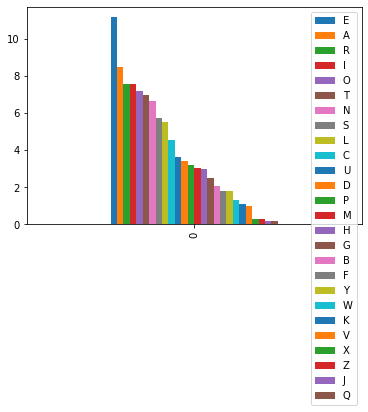

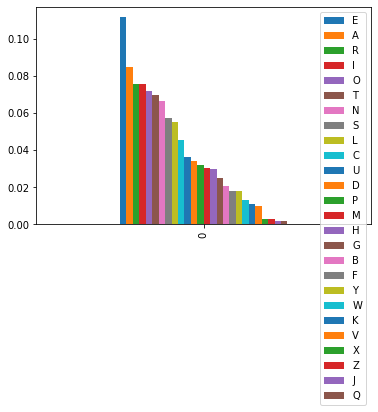

In [351]:
# non normalized

freq_dict = {"E":11.1607,
"A":8.4966,
"R":7.5809,
"I":7.5448,
"O":7.1635,
"T":6.9509,
"N":6.6544,
"S":5.7351,
"L":5.4893,
"C":4.5388,
"U":3.6308,
"D":3.3844,
"P":3.1671,
"M":3.0129,
"H":3.0034,
"G":2.4705,
"B":2.0720,
"F":1.8121,
"Y":1.7779,
"W":1.2899,
"K":1.1016,
"V":1.0074,
"X":0.2902,
"Z":0.2722,
"J":0.1965,
"Q":0.1962}

# normalized
# freq_dict = {"E":0.111607,
# "A":0.08496600000000001,
# "R":0.075809,
# "I":0.075448,
# "O":0.071635,
# "T":0.069509,
# "N":0.06654399999999999,
# "S":0.057351,
# "L":0.054893,
# "C":0.045388000000000005,
# "U":0.036308,
# "D":0.033844,
# "P":0.031671,
# "M":0.030129000000000003,
# "H":0.030034,
# "G":0.024704999999999998,
# "B":0.020720000000000002,
# "F":0.018121,
# "Y":0.017779,
# "W":0.012899,
# "K":0.011016,
# "V":0.010074000000000001,
# "X":0.002902,
# "Z":0.002722,
# "J":0.001965,
# "Q":0.001962}



# [How to Sort a Dictionary by Value in Python](https://stackabuse.com/how-to-sort-dictionary-by-value-in-python/)
import operator

# letters = list(freq_dict.keys())
# freq_vals = list(freq_dict.values())

print(letters)
print(freq_vals)

dict1 = freq_dict
sorted_tuples = sorted(dict1.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
sorted_dict = {k: v for k, v in sorted_tuples}
print(sorted_dict)
freq_dict = sorted_dict

df = pd.DataFrame([
    list(freq_dict.values())
    ],columns=list(freq_dict.keys())
    )
display(df)
import matplotlib.pyplot as plt 
df.plot(kind = 'bar')


freqency_list = list(freq_dict.values()) 
print(freqency_list)
total_sum = sum(freqency_list)
normalized = []
for num in freqency_list:
    normalized.append(num/total_sum)
print(normalized)
temp_dict = freq_dict
for i, letter in enumerate(temp_dict):
    freq_dict[letter] = normalized[i]
print(freq_dict)




df = pd.DataFrame([
    list(freq_dict.values())
    ],columns=list(freq_dict.keys())
    )
display(df)
import matplotlib.pyplot as plt 
df.plot(kind = 'bar')

temp = freq_dict
temp = list(temp.values())
print(temp)
print("\n")

result = []
# note range(1,len(temp)+1) the 1's make the index start at with splice [0.397819486274563] instead of empty
for i in range(1,len(temp)+1):
    result.append(sum(temp[0:i]))
print(result)
print("\n")

freq_vals = result
letters = list(freq_dict.keys())
print(letters)
print(freq_vals)

# what this does is convert the frequecy distubtion of the letters into 
# a linear scale
temp = freq_dict
temp = list(temp.values())
print(temp)
print("\n")

result = []
# note range(1,len(temp)+1) the 1's make the index start at with splice [0.397819486274563] instead of empty
for i in range(1,len(temp)+1):
    result.append(sum(temp[0:i]))
print(result)
print("\n")

freq_vals = result
letters = list(freq_dict.keys())
print(letters)
print(freq_vals)

import random
# dist = freq_dict
dist = freq_vals
# get random number betwe
df = pd.DataFrame([
    list(freq_dict.values())
    ],columns=list(freq_dict.keys())
    )
display(df)
print("here")
def gen_weighted_character(_freq_vals,_letters):
    random_num = random.random()
    # print(random_num)
    for i, num in enumerate(_freq_vals): 
        # print(not random_num > num,end=f", {_letters[i]}, ")
        # print(num)
        if  not random_num > num:
            return _letters[i]
def generate_weighted_word(word_length = 5):
    result = ""
    for x in range(0,word_length):
        result+=gen_weighted_character(freq_vals,letters)
    return result

def generate_weighted_words(num_words, low=2,high=5):
    return [ generate_weighted_word(random.randint(low,high)) for x in range(0,num_words)]

print(" ".join(generate_weighted_words(20)))
print(" ".join(generate_weighted_words(20)))
print(" ".join(generate_weighted_words(20)))
print(" ".join(generate_weighted_words(20)))



In [345]:
sum([0.111607,0.08496600000000001,0.075809,0.075448,0.071635,0.069509,0.06654399999999999,0.057351,0.054893,0.045388000000000005,0.036308,0.033844,0.031671,0.030129000000000003,0.030034,0.024704999999999998,0.020720000000000002,0.018121,0.017779,0.012899,0.011016,0.010074000000000001,0.002902,0.002722,0.001965,0.001962])

1.000001

In [344]:
res = [
11.1607,
8.4966,
7.5809,
7.5448,
7.1635,
6.9509,
6.6544,
5.7351,
5.4893,
4.5388,
3.6308,
3.3844,
3.1671,
3.0129,
3.0034,
2.4705,
2.0720,
1.8121,
1.7779,
1.2899,
1.1016,
1.0074,
0.2902,
0.2722,
0.1965,
0.1962]
results = [num/100.0 for num in res]
print(",".join(list(map(lambda a: str(a),results))))

0.111607,0.08496600000000001,0.075809,0.075448,0.071635,0.069509,0.06654399999999999,0.057351,0.054893,0.045388000000000005,0.036308,0.033844,0.031671,0.030129000000000003,0.030034,0.024704999999999998,0.020720000000000002,0.018121,0.017779,0.012899,0.011016,0.010074000000000001,0.002902,0.002722,0.001965,0.001962
